### This code is used to combine the plot of the data from SGD and Adam

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [14]:
working_dir = os.getcwd()
print(working_dir)

# find the parent directory
parent_dir = os.path.dirname(working_dir)
print(parent_dir)
data_folder = parent_dir + '/data'
print(data_folder)

SGD_foler = data_folder + '/epoch_30SGD_GPU'
Adam_folder = data_folder + '/epoch_30Adam'
print(SGD_foler, Adam_folder)

# load SGD data
SGD_test_acc = np.load(os.path.join(SGD_foler + '/test_acc.npy'), allow_pickle=True)
SGD_train_acc = np.load(os.path.join(SGD_foler + '/train_acc.npy'), allow_pickle=True)
SGD_train_loss = np.load(os.path.join(SGD_foler + '/train_l.npy'), allow_pickle=True)
SGD_time_forward = np.load(os.path.join(SGD_foler + '/time_forward.npy'), allow_pickle=True)
SGD_time_round = np.load(os.path.join(SGD_foler + '/time_round.npy'), allow_pickle=True)
SGD_time_epoch = np.load(os.path.join(SGD_foler + '/time_epoch.npy'), allow_pickle=True)
SGD_energy_epoch = np.load(os.path.join(SGD_foler + '/energy_epoch.npy'), allow_pickle=True)

# load Adam data
Adam_test_acc = np.load(os.path.join(Adam_folder + '/test_acc.npy'), allow_pickle=True)
Adam_train_acc = np.load(os.path.join(Adam_folder + '/train_acc.npy'), allow_pickle=True)
Adam_train_loss = np.load(os.path.join(Adam_folder + '/train_l.npy'), allow_pickle=True)
Adam_time_forward = np.load(os.path.join(Adam_folder + '/time_forward.npy'), allow_pickle=True)
Adam_time_round = np.load(os.path.join(Adam_folder + '/time_round.npy'), allow_pickle=True)
Adam_time_epoch = np.load(os.path.join(Adam_folder + '/time_epoch.npy'), allow_pickle=True)
Adam_energy_epoch = np.load(os.path.join(Adam_folder + '/energy_epoch.npy'), allow_pickle=True)

# print data shape
print(SGD_train_acc.shape, SGD_train_loss.shape, SGD_time_forward.shape, SGD_time_round.shape, SGD_time_epoch.shape, SGD_energy_epoch.shape)
print(Adam_train_acc.shape, Adam_train_loss.shape, Adam_time_forward.shape, Adam_time_round.shape, Adam_time_epoch.shape, Adam_energy_epoch.shape)

/home/yj/FinalThesis/GreenAI/Alexnet/code
/home/yj/FinalThesis/GreenAI/Alexnet
/home/yj/FinalThesis/GreenAI/Alexnet/data
/home/yj/FinalThesis/GreenAI/Alexnet/data/epoch_30SGD_GPU /home/yj/FinalThesis/GreenAI/Alexnet/data/epoch_30Adam
(30, 469) (30, 469) (30, 6) (30, 6) (30, 2) (30, 1)
(30, 469) (30, 469) (30, 6) (30, 6) (30, 2) (30, 1)


In [15]:
def change_to_float(energy_epoch):
    energy_epoch_f = energy_epoch.astype(float)
    energy_epochfloat = energy_epoch_f.reshape(1, -1)
    energy_epochfloat = energy_epochfloat[0]
    return energy_epochfloat

SGD_energy_epochfloat = change_to_float(SGD_energy_epoch)
Adam_energy_epochfloat = change_to_float(Adam_energy_epoch)
print(SGD_energy_epochfloat.shape, Adam_energy_epochfloat.shape)

(30,) (30,)


/tmp/ipykernel_11861/1519079682.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  energy_epoch_f = energy_epoch.astype(float)


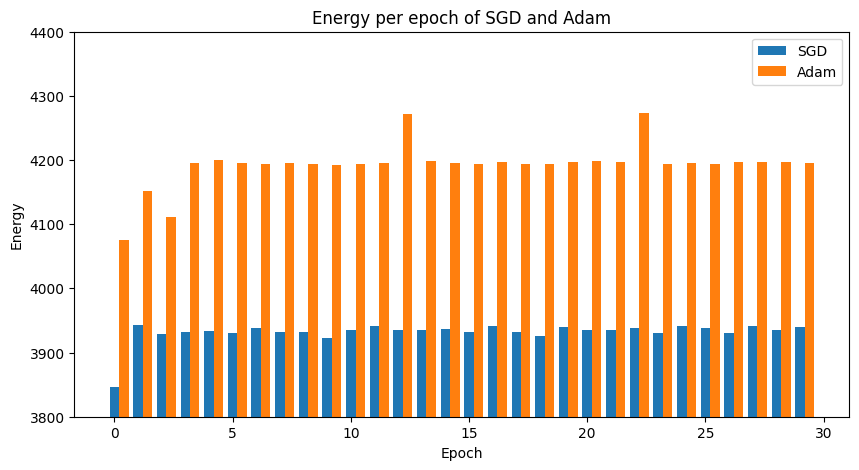

In [16]:
# plot SGD_energy_epoch and Adam_energy_epoch using bar chart side by side in same figure
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(SGD_energy_epochfloat)), SGD_energy_epochfloat, width=0.4, label='SGD')
plt.bar(np.arange(len(Adam_energy_epochfloat))+0.4, Adam_energy_epochfloat, width=0.4, label='Adam')
plt.xlabel('Epoch')
plt.ylabel('Energy')
plt.title('Energy per epoch of SGD and Adam')
plt.ylim(3800,4400)
plt.legend()
plt.show()


#### train_acc

In [17]:
print(SGD_train_acc.shape)
print(Adam_train_acc.shape)

(30, 469)
(30, 469)


##### SGD train_acc

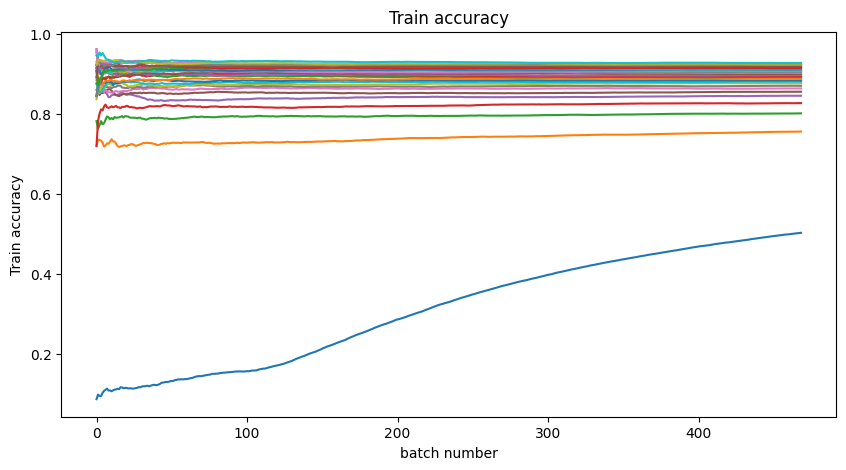

In [18]:
# plot SGD train accuracy of each epoch in one figure
plt.figure(figsize=(10, 5))
for i in range(len(SGD_train_acc)):
    plt.plot(SGD_train_acc[i])
plt.xlabel('batch number')
plt.ylabel('Train accuracy')
plt.title('Train accuracy')
plt.show()

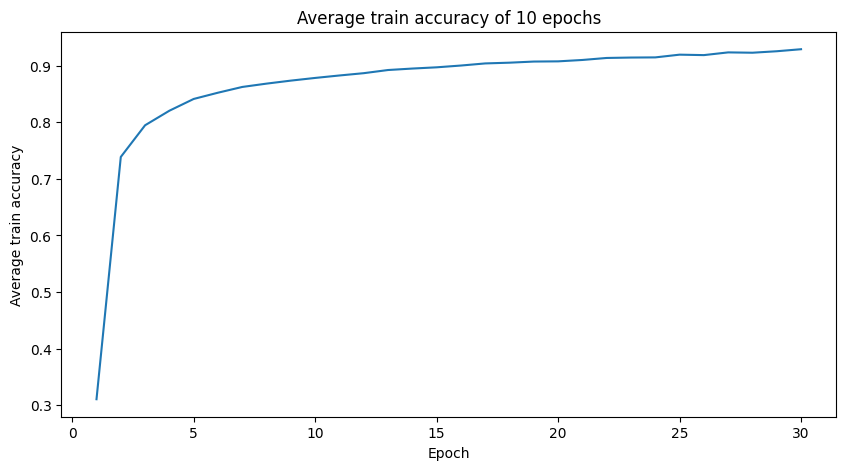

In [31]:
# calculate average train accuracy of each epoch
SGD_train_acc_mean = []
for i in range(len(SGD_train_acc)):
    SGD_train_acc_mean.append(np.mean(SGD_train_acc[i]))
SGD_train_acc_mean

# plot average train accuracy of each epoch
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1,31),SGD_train_acc_mean)
plt.xlabel('Epoch')
plt.ylabel('Average train accuracy')
plt.title('Average train accuracy of 10 epochs')
plt.show()

##### Adam train_acc

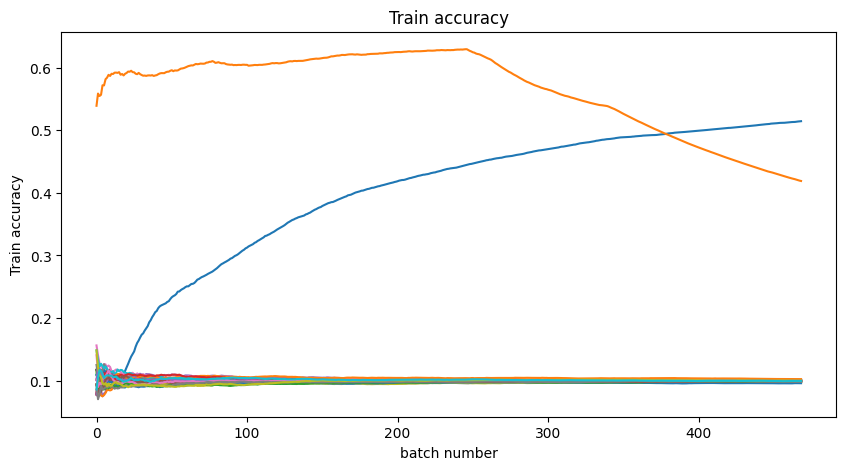

In [20]:
# plot Adam train accuracy of each epoch in one figure
plt.figure(figsize=(10, 5))
for i in range(len(Adam_train_acc)):
    plt.plot(Adam_train_acc[i])
plt.xlabel('batch number')
plt.ylabel('Train accuracy')
plt.title('Train accuracy')
plt.show()

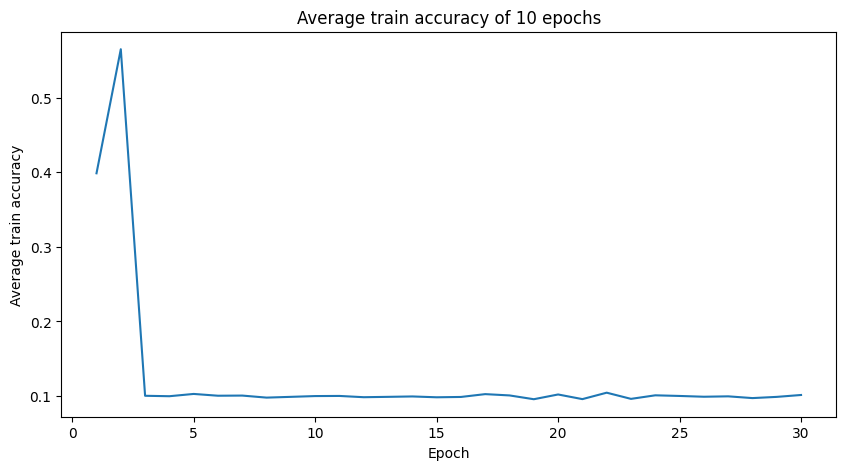

In [32]:
# calculate average train accuracy of each epoch
Adam_train_acc_mean = []
for i in range(len(Adam_train_acc)):
    Adam_train_acc_mean.append(np.mean(Adam_train_acc[i]))
Adam_train_acc_mean

# plot average train accuracy of each epoch
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1,31),Adam_train_acc_mean)
plt.xlabel('Epoch')
plt.ylabel('Average train accuracy')
plt.title('Average train accuracy of 10 epochs')
plt.show()

#### test_acc

In [23]:
print(SGD_test_acc.shape)
print(Adam_test_acc.shape)

(30,)
(30,)


##### SGD_test_acc

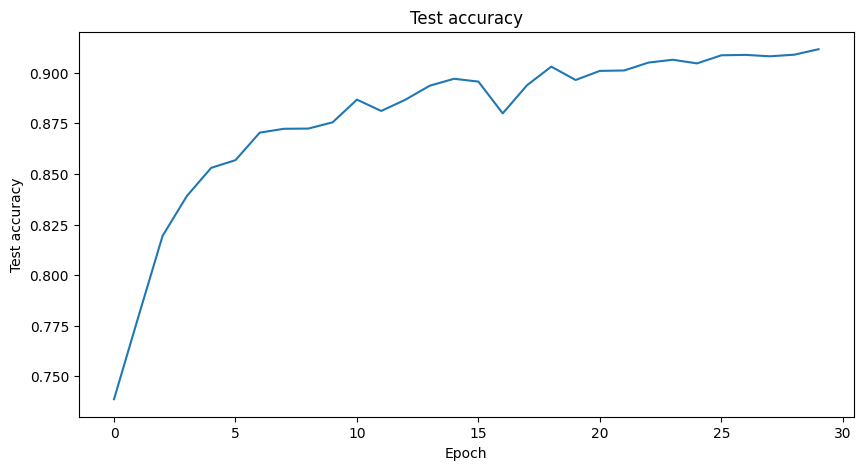

In [24]:
# plot test accuracy
plt.figure(figsize=(10, 5))
plt.plot(SGD_test_acc)
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')
plt.title('Test accuracy')
plt.show()

##### Adam_test_acc

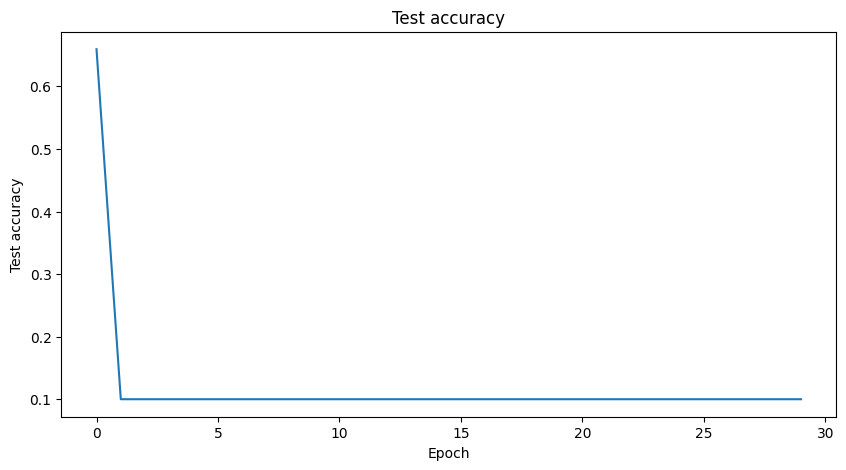

In [25]:
# plot test accuracy
plt.figure(figsize=(10, 5))
plt.plot(Adam_test_acc)
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')
plt.title('Test accuracy')
plt.show()

#### train_loss

In [26]:
print(SGD_train_loss.shape)
print(Adam_train_loss.shape)

(30, 469)
(30, 469)


##### SGD train_loss

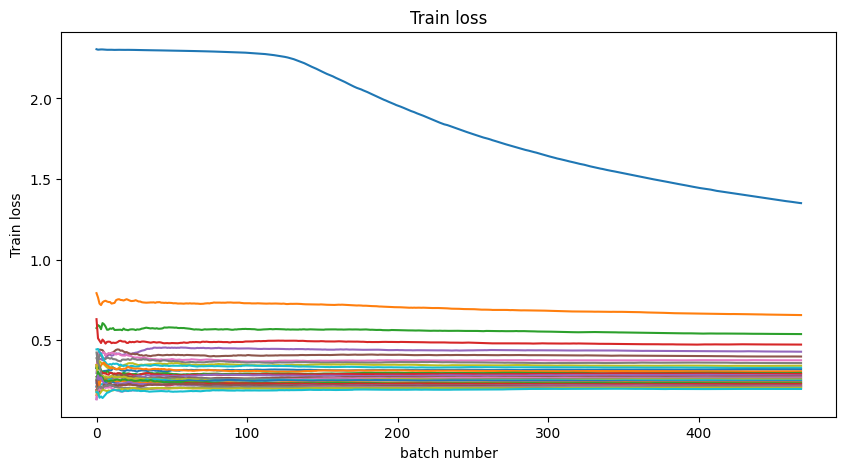

In [27]:
# plot train loss of each epoch in one figure
plt.figure(figsize=(10, 5))
for i in range(len(SGD_train_loss)):
    plt.plot(SGD_train_loss[i])
plt.xlabel('batch number')
plt.ylabel('Train loss')
plt.title('Train loss')
plt.show()

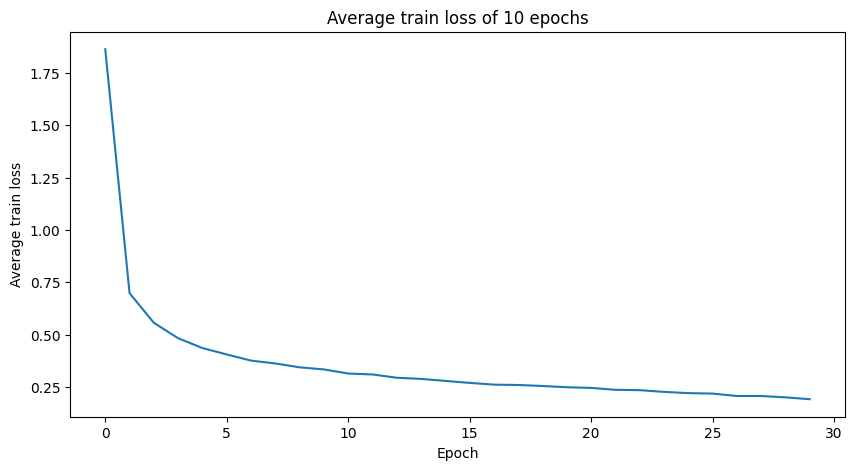

In [33]:
# calculate average train loss of each epoch
SGD_train_loss_mean = []
for i in range(len(SGD_train_loss)):
    SGD_train_loss_mean.append(np.mean(SGD_train_loss[i]))
SGD_train_loss_mean

# plot average train loss of each epoch
plt.figure(figsize=(10, 5))
plt.plot(SGD_train_loss_mean)
plt.xlabel('Epoch')
plt.ylabel('Average train loss')
plt.title('Average train loss of 10 epochs')
plt.show()

##### Adam train_loss

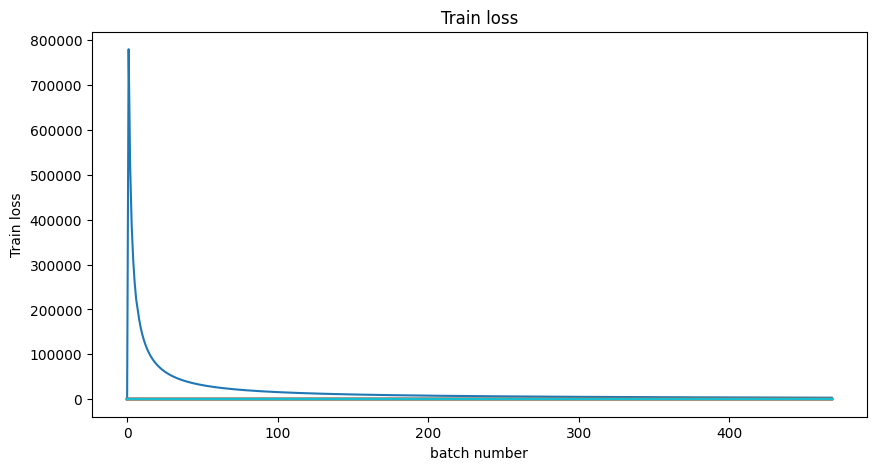

In [29]:
# plot train loss of each epoch in one figure
plt.figure(figsize=(10, 5))
for i in range(len(Adam_train_loss)):
    plt.plot(Adam_train_loss[i])
plt.xlabel('batch number')
plt.ylabel('Train loss')
plt.title('Train loss')
plt.show()

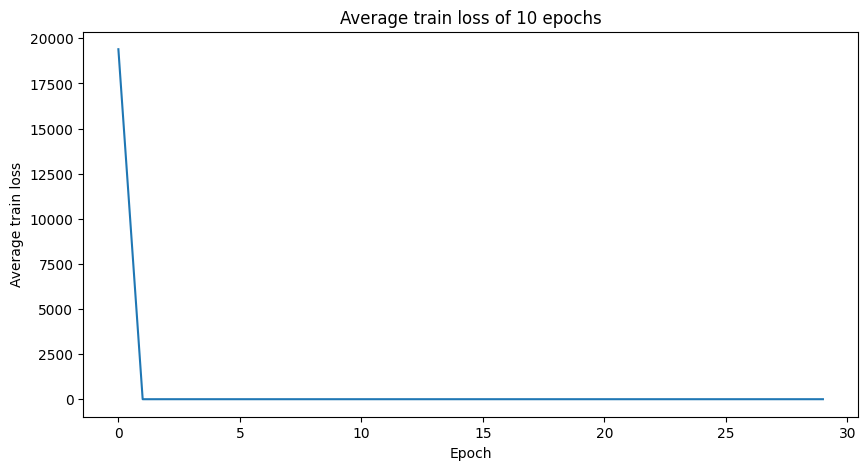

In [34]:
# calculate average train loss of each epoch
Adam_train_loss_mean = []
for i in range(len(Adam_train_loss)):
    Adam_train_loss_mean.append(np.mean(Adam_train_loss[i]))
Adam_train_loss_mean

# plot average train loss of each epoch
plt.figure(figsize=(10, 5))
plt.plot(Adam_train_loss_mean)
plt.xlabel('Epoch')
plt.ylabel('Average train loss')
plt.title('Average train loss of 10 epochs')
plt.show()

#### combined results of train_acc anc test_acc of SGD and Adam

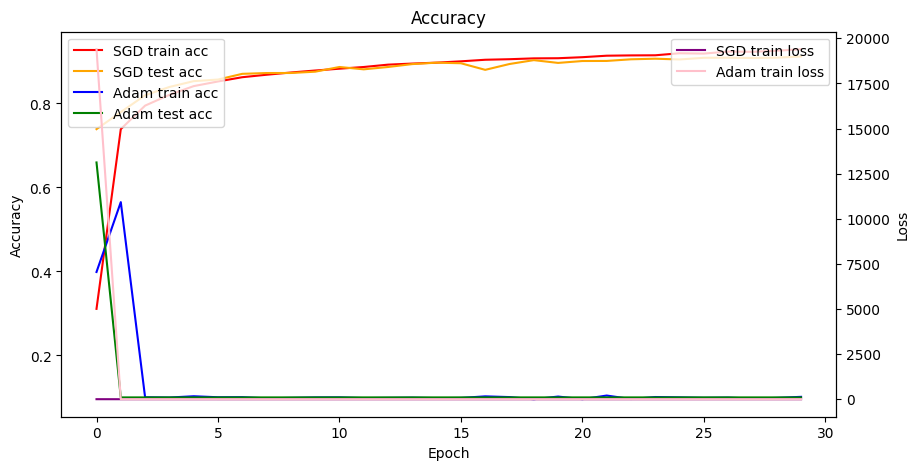

In [38]:
# plot SGD train acc, SGD test acc, SGD train loss, Adam train acc, Adam test acc and Adam train loss in one figure
# the left y axis is accuracy and the right y axis is loss
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(SGD_train_acc_mean, label='SGD train acc', color='red')
ax1.plot(SGD_test_acc, label='SGD test acc', color='orange')
ax1.plot(Adam_train_acc_mean, label='Adam train acc', color='blue')
ax1.plot(Adam_test_acc, label='Adam test acc', color='green')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(SGD_train_loss_mean, label='SGD train loss', color='purple')
ax2.plot(Adam_train_loss_mean, label='Adam train loss', color='pink')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')
plt.show()

#### time round

In [40]:
print(SGD_time_epoch.shape)
print(Adam_time_epoch.shape)

(30, 2)
(30, 2)


##### combined plot

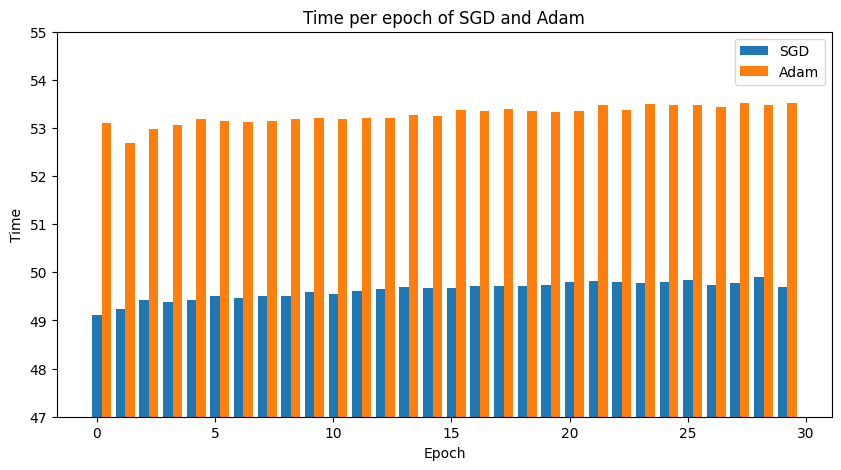

In [43]:
# plot SGD_time_epoch and Adam_time_epoch using bar chart side by side in same figure
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(SGD_time_epoch)), SGD_time_epoch[:,1], width=0.4, label='SGD')
plt.bar(np.arange(len(Adam_time_epoch))+0.4, Adam_time_epoch[:,1], width=0.4, label='Adam')
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Time per epoch of SGD and Adam')
plt.ylim(47,55)
plt.legend()
plt.show()

#### energy and time plot

In [44]:
print(SGD_time_epoch.shape)
print(Adam_time_epoch.shape)
print(SGD_energy_epoch.shape)
print(Adam_energy_epoch.shape)

(30, 2)
(30, 2)
(30, 1)
(30, 1)


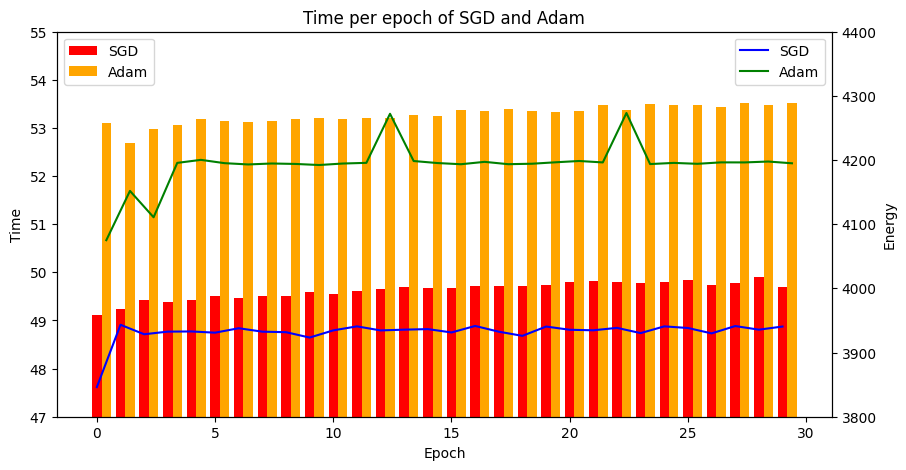

In [47]:
# plot SGD_time_epoch, SGD_energy_epoch, Adam_time_epoch and Adam_energy_epoch using bar chart side by side in same figure
# the left y axis is time and the right y axis is energy
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.bar(np.arange(len(SGD_time_epoch)), SGD_time_epoch[:,1], width=0.4, label='SGD', color='red')
ax1.bar(np.arange(len(Adam_time_epoch))+0.4, Adam_time_epoch[:,1], width=0.4, label='Adam', color='orange')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Time')
ax1.set_ylim(47,55)
ax1.set_title('Time per epoch of SGD and Adam')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(np.arange(len(SGD_energy_epoch)), SGD_energy_epochfloat, label='SGD', color='blue')
ax2.plot(np.arange(len(Adam_energy_epoch))+0.4, Adam_energy_epochfloat, label='Adam', color='green')
ax2.set_ylabel('Energy')
ax2.set_ylim(3800,4400)
ax2.legend(loc='upper right')
plt.show()